In [717]:
import pandas as pd
import numpy as np
df = pd.read_csv('ratings_small.csv')
df.head(2)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179


In [718]:
df = df.drop('timestamp', axis=1)
df.head(2)

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0


In [719]:
## choose a random lines from the dataframe

samp_ = df.sample(5)
users = samp_['userId'].values
movies = samp_['movieId'].values
ratings = samp_['rating'].values

In [720]:
b = pd.pivot_table(df, values='rating', index='userId', columns='movieId')


In [721]:
# ## cria a matriz B
# b = matrix.copy()


In [722]:
# substitui um elemento aleatório que não seja NAN da matriz B por um valor aleatorio de 0 a 5.
for i in range(len(ratings)):
    b.iloc[users[i], movies[i]] = (np.random.randint(5, 51)*0.1)
    # print(users[i], movies[i], ratings[i])
    # print(b.iloc[users[i], movies[i]])

In [723]:
## substitui os NANs da matriz B por 2.5
b = b.fillna(2.75)

In [724]:
b = b.to_numpy()

In [725]:
def selecionar_K_primeiros_valores (u, s, vt, K):
    """Remove elementos de u, s e vt deixando somente K componentes restantes
    """ 
    u_ = u[:,0:K]
    s_ = s[:K]
    vt_ = vt[:K,:]
    return u_, s_, vt_

In [726]:
from scipy.linalg import svd, diagsvd

## calcula a SVD da matriz B
U, s, Vt = svd(b)


In [727]:
import matplotlib.pyplot as plt


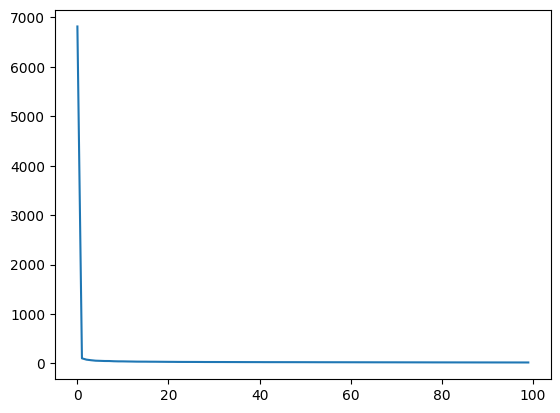

In [728]:
plt.plot(s[:100])
plt.show()

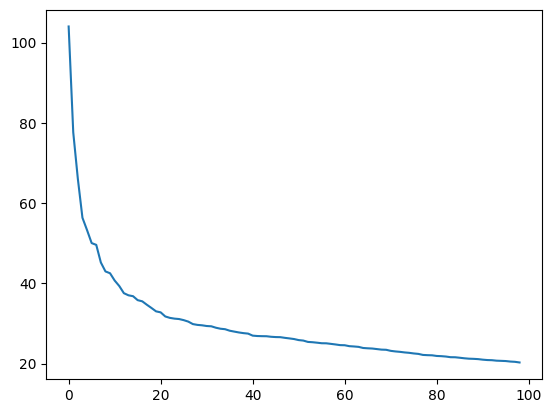

In [729]:
## plot the s values
plt.plot(s[1:100])
plt.show()

In [730]:
#retira os K ultimos valores das matrizes U, s e Vt

U_, s_, Vt_ = selecionar_K_primeiros_valores(U, s, Vt, 20)

In [731]:
## reconstrói a matriz B com a retirada do ruido a partir da SVD
B_ = U_ @ diagsvd(s_, U_.shape[1], Vt_.shape[0]) @ Vt_

## compara o valor da matriz original, da matriz B e da matriz B_ (com ruido retirado)
for i in range(len(ratings)):
    print(f"valor_original{i} : {ratings[i]}")
    print(f"valor ruidoso: {i} : {b[users[i], movies[i]]}")
    print(f"valor apos retirada do ruido{i} : {B_[users[i], movies[i]]}")
    print(f"diferenca{i}: {b[users[i], movies[i]] - B_[users[i], movies[i]]}")



valor_original0 : 2.0
valor ruidoso: 0 : 2.8000000000000003
valor apos retirada do ruido0 : 3.0937749468217812
diferenca0: -0.29377494682178096
valor_original1 : 4.0
valor ruidoso: 1 : 2.9000000000000004
valor apos retirada do ruido1 : 2.721677743047725
diferenca1: 0.17832225695227555
valor_original2 : 5.0
valor ruidoso: 2 : 4.9
valor apos retirada do ruido2 : 2.811733991882012
diferenca2: 2.0882660081179885
valor_original3 : 5.0
valor ruidoso: 3 : 4.7
valor apos retirada do ruido3 : 2.8063784318190494
diferenca3: 1.8936215681809507
valor_original4 : 5.0
valor ruidoso: 4 : 3.5
valor apos retirada do ruido4 : 2.763330968824844
diferenca4: 0.7366690311751558
